In [ ]:
import pandas as pd
import numpy as np

###`Q-1:` Write a program to create an empty series.

In [ ]:
# code here
a = pd.Series([])

In [ ]:
a

,0


In [ ]:
type(a)

pandas.core.series.Series

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [ ]:
# code here
s1 = pd.Series([1,3,5,7,9])
s2 = pd.Series([2,4,6,8,0])

In [ ]:
s1 + s2

,0
0,3
1,7
2,11
3,15
4,9


In [ ]:
s1 - s2

,0
0,-1
1,-1
2,-1
3,-1
4,9


In [ ]:
s1 * s2

,0
0,2
1,12
2,30
3,56
4,0


In [ ]:
s1 / s2

,0
0,0.500000
1,0.750000
2,0.833333
3,0.875000
4,inf


In [ ]:
s1 = [1,2,3,4,5]
s2 = [6,7,8,9,0]

s = pd.Series(s1,name = "Kuch bhi",index = s2)
s

,Kuch bhi
6,1
7,2
8,3
9,4
0,5


In [ ]:
for (i,j) in enumerate(s1):
  print(i + j)

1
3
5
7
9


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [ ]:
# code here

s1 = [2, 4, 6, 8, 10]
s2 = [1, 3, 5, 7, 10]

s1 = pd.Series(s1)
s2 = pd.Series(s2)

result = (s1 == s2)
print(result)


0    False
1    False
2    False
3    False
4     True
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [ ]:
""""
pd.to_numeric() is a very important Pandas function used to convert data (usually strings) into numeric values safely.

Let’s understand it step-by-step, very simply, with examples.

What is pd.to_numeric()?

It converts a Series, list, or column into a numeric type (int or float).

pd.to_numeric(arg, errors='raise', downcast=None)

Basic Example
import pandas as pd

s = pd.Series(['10', '20', '30'])
print(pd.to_numeric(s))


Output

0    10
1    20
2    30
dtype: int64


👉 Strings → Numbers

Handling Invalid Values (errors parameter)
1️⃣ errors='raise' (default)

Throws an error if conversion fails.

s = pd.Series(['10', '20', 'abc'])
pd.to_numeric(s)


❌ Error (because 'abc' is not numeric)

2️⃣ errors='coerce' ⭐ (very important)

Invalid values become NaN.

s = pd.Series(['10', '20', 'abc'])
print(pd.to_numeric(s, errors='coerce'))


Output

0    10.0
1    20.0
2     NaN
dtype: float64


👉 Very useful in data cleaning

3️⃣ errors='ignore'

Returns original data (no conversion).

pd.to_numeric(s, errors='ignore')

Converting a DataFrame Column
df = pd.DataFrame({
    'price': ['100', '200', 'xyz']
})

df['price'] = pd.to_numeric(df['price'], errors='coerce')
print(df)


Output

   price
0  100.0
1  200.0
2    NaN

downcast Parameter (Memory Optimization)
Convert to smaller numeric type
s = pd.Series([1, 2, 3, 4])

print(pd.to_numeric(s, downcast='integer'))


Possible values:

'integer' → int8, int16, etc.

'float' → float32

'signed', 'unsigned'

👉 Helps reduce memory usage

Common Real-World Use Cases

✔ Convert CSV columns that are read as strings
✔ Clean dirty data ('N/A', '?', 'abc')
✔ Prepare data for math operations
✔ Before plotting or ML models

# Difference: astype(int) vs pd.to_numeric()

Feature	               astype()       pd.to_numeric()
Handles invalid data	  ❌ No	          ✅ Yes (coerce)
Safer                 	❌	              ✅
Data cleaning	          ❌              	✅


# The Actual Rule (Important ⭐)
🔹 If all values are valid integers

➡ Pandas converts to int64

🔹 If any value is non-integer or NaN

➡ Pandas converts to float64


# IMPORTANT: downcast='integer' is best-effort

It only works when:

✅ no NaN

✅ all values are integers

Otherwise → ignored


"""

In [ ]:
# code here
def changing_dtype(s , obj):
  # s=s.astype('float64')
  s = pd.to_numeric(s,errors = 'ignore')
  return s

series = pd.Series([1,2,'Python', 2.0, True, 100])
obj = series.dtype
s = changing_dtype(series , obj)
print(s)


0         1
1         2
2    Python
3       2.0
4      True
5       100
dtype: object


/tmp/ipython-input-238363672.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  s = pd.to_numeric(s,errors = 'ignore')


In [ ]:
def changing_dtype(s , obj):
  # s=s.astype('float64')
  s = pd.to_numeric(s,errors = 'coerce',downcast='integer')
  return s

series = pd.Series([1,2,'Python', 2.0, True, 100])
obj = series.dtype
s = changing_dtype(series , obj)
print(s)


0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

In [ ]:
df = pd.read_csv('/content/batsman_runs_series.csv')
# runs = pd.Series(df['batsman_run'].to_numpy(),index = df['batter'])
runs = df.set_index('batter')['batsman_run'] # .rename("Batsman ke runs in ipl")
runs

,batsman_run
batter,
A Ashish Reddy,280
A Badoni,161
A Chandila,4
A Chopra,53
A Choudhary,25
...,...
Yash Dayal,0
Yashpal Singh,47
Younis Khan,3


###`Q-6` Find top 10 most run getter from the series.

In [ ]:
runs

,batsman_run
batter,
A Ashish Reddy,280
A Badoni,161
A Chandila,4
A Chopra,53
A Choudhary,25
...,...
Yash Dayal,0
Yashpal Singh,47
Younis Khan,3


In [ ]:
# code here

top_10_most_run_getter = runs.sort_values(ascending=False).head(10)

In [ ]:
top_10_most_run_getter

,batsman_run
batter,
V Kohli,6634
S Dhawan,6244
DA Warner,5883
RG Sharma,5881
SK Raina,5536
AB de Villiers,5181
CH Gayle,4997
MS Dhoni,4978
RV Uthappa,4954


###`Q-7` No of players having runs above 3000

In [ ]:
# code here
runs[runs > 3000]

,batsman_run
batter,
AB de Villiers,5181
AM Rahane,4074
AT Rayudu,4190
CH Gayle,4997
DA Warner,5883
F du Plessis,3403
G Gambhir,4217
KA Pollard,3437
KD Karthik,4377


In [ ]:
runs[runs > 3000].size

20

###`Q-8` No of players having runs above mean value?

In [ ]:
# code here
mean = int(runs.mean().item())

In [ ]:
runs[runs > mean]

,batsman_run
batter,
A Symonds,974
AB de Villiers,5181
AC Gilchrist,2069
AD Mathews,724
AD Russell,2039
...,...
WP Saha,2427
Y Venugopal Rao,985
YBK Jaiswal,547


In [ ]:
runs[runs > mean].size

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [ ]:
df = pd.read_csv('/content/items.csv')
df

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39
4,Chicken Bowl,$16.98
...,...,...
4617,Steak Burrito,$11.75
4618,Steak Burrito,$11.75
4619,Chicken Salad Bowl,$11.25
4620,Chicken Salad Bowl,$8.75


In [ ]:
# code here
item = pd.Series(df['item_price'].to_numpy() , index = df['item_name'])
items = df.set_index('item_name')['item_price']

In [ ]:
item

,0
item_name,
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98
...,...
Steak Burrito,$11.75
Steak Burrito,$11.75
Chicken Salad Bowl,$11.25


In [ ]:
items

,item_price
item_name,
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98
...,...
Steak Burrito,$11.75
Steak Burrito,$11.75
Chicken Salad Bowl,$11.25


In [ ]:
item.isnull().sum().item()

50

In [ ]:
item = item.str.replace("$", "", regex=False)

In [ ]:
item = pd.to_numeric(item , downcast = 'float')

In [ ]:
item = item * 91

In [ ]:
mean = item.mean()

In [ ]:
item = item.fillna(mean)

In [ ]:
item.isnull().sum()

np.int64(0)

###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [ ]:
# code here
item.mean().item()

679.1358642578125

In [ ]:
item.quantile(0.30).item()

404.9499816894531

In [ ]:
item.quantile(0.06).item()

113.75

<Axes: ylabel='Frequency'>

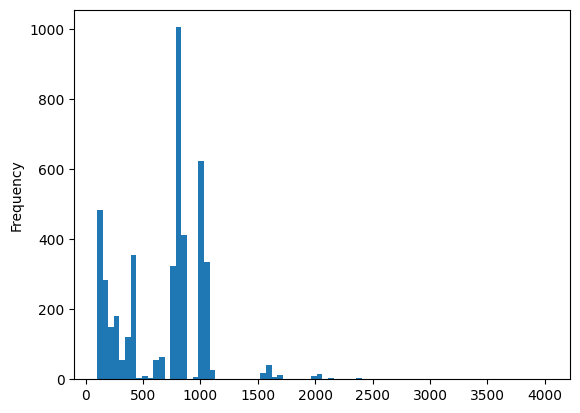

In [ ]:
item.plot(kind = 'hist',bins=80)

In [ ]:
item[item.between(1000,2000)].size

979